DEEP FACE DETECTION MODEL USING TENSORFLOW AND PYTHON

# 1. Install Dependencies and Setup

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [2]:
!pip list

Package                       Version
----------------------------- ---------------------
absl-py                       1.4.0
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
anyio                         3.6.2
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
array-record                  0.2.0
arviz                         0.15.1
astropy                       5.2.2
astunparse                    1.6.3
attrs                         23.1.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.12.1
backcall                      0.2.0
beautifulsoup4                4.11.2
bleach                        6.0.0
blis                          0.7.9
blosc2                        2.0.0
bokeh                         2.4.3
branca                        0.6.0
build                         0.10.0
CacheControl                  0.12.11
ca

In [3]:
import tensorflow as tf
import os

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2. Remove dodgy images

In [7]:
import cv2
import imghdr

In [8]:
data_dir = '/content/drive/MyDrive/data'

In [9]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [10]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [11]:
import numpy as np
from matplotlib import pyplot as plt

In [12]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 305 files belonging to 2 classes.


In [13]:
data_iterator = data.as_numpy_iterator()

In [14]:
batch = data_iterator.next()

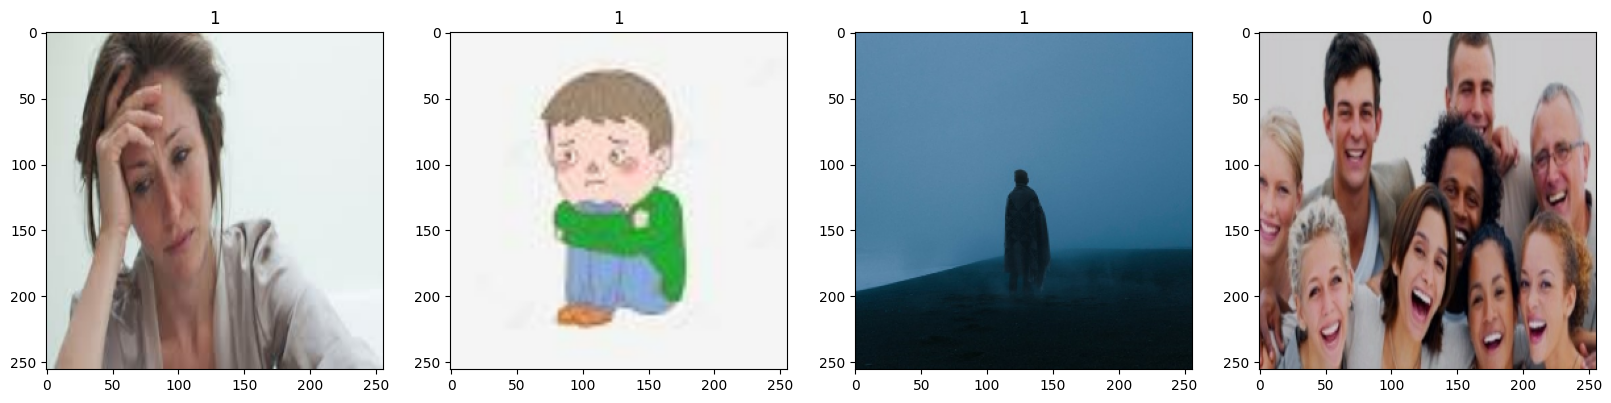

In [15]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [16]:
data = data.map(lambda x,y: (x/255, y))

In [17]:
data.as_numpy_iterator().next()

(array([[[[0.827451  , 0.78431374, 0.65882355],
          [0.827451  , 0.78431374, 0.65882355],
          [0.827451  , 0.78431374, 0.65882355],
          ...,
          [0.85490197, 0.83137256, 0.74509805],
          [0.85490197, 0.83137256, 0.74509805],
          [0.85490197, 0.83137256, 0.74509805]],
 
         [[0.827451  , 0.78431374, 0.65882355],
          [0.827451  , 0.78431374, 0.65882355],
          [0.827451  , 0.78431374, 0.65882355],
          ...,
          [0.85490197, 0.83137256, 0.74509805],
          [0.85490197, 0.83137256, 0.74509805],
          [0.85490197, 0.83137256, 0.74509805]],
 
         [[0.827451  , 0.78431374, 0.65882355],
          [0.827451  , 0.78431374, 0.65882355],
          [0.827451  , 0.78431374, 0.65882355],
          ...,
          [0.85490197, 0.83137256, 0.74509805],
          [0.85490197, 0.83137256, 0.74509805],
          [0.85490197, 0.83137256, 0.74509805]],
 
         ...,
 
         [[0.80784315, 0.7490196 , 0.63529414],
          [0.80784

# 5. Split Data

In [18]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [19]:
train_size

7

In [20]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [21]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [23]:
model = Sequential()

In [24]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [25]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [27]:
logdir='logs'

In [28]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [29]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 17s 2s/step - loss: 0.7716 - accuracy: 0.5536 - val_loss: 0.6323 - val_accuracy: 0.7500
Epoch 2/20
7/7 [==============================] - 15s 2s/step - loss: 0.6138 - accuracy: 0.6384 - val_loss: 0.7223 - val_accuracy: 0.6094
Epoch 3/20
7/7 [==============================] - 15s 2s/step - loss: 0.6291 - accuracy: 0.6786 - val_loss: 0.5538 - val_accuracy: 0.5625
Epoch 4/20
7/7 [==============================] - 16s 2s/step - loss: 0.4554 - accuracy: 0.7991 - val_loss: 0.4015 - val_accuracy: 0.8281
Epoch 5/20
7/7 [==============================] - 16s 2s/step - loss: 0.4006 - accuracy: 0.8080 - val_loss: 0.2892 - val_accuracy: 0.8750
Epoch 6/20
7/7 [==============================] - 15s 2s/step - loss: 0.2492 - accuracy: 0.9420 - val_loss: 0.1575 - val_accuracy: 0.9844
Epoch 7/20
7/7 [==============================] - 16s 2s/step - loss: 0.1898 - accuracy: 0.9464 - val_loss: 0.1229 - val_accuracy: 0.9688
Epoch 8/20
7/7 [==================

# 8. Plot Performance

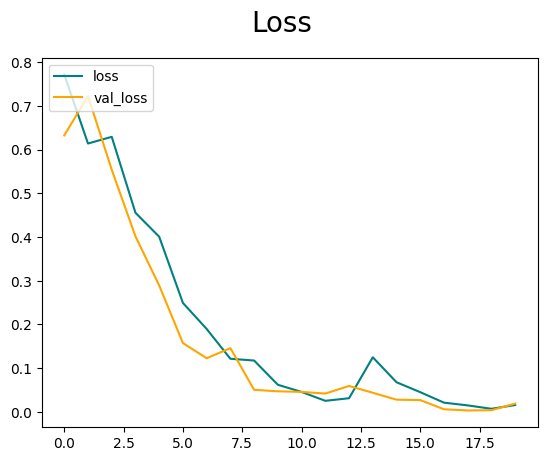

In [38]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

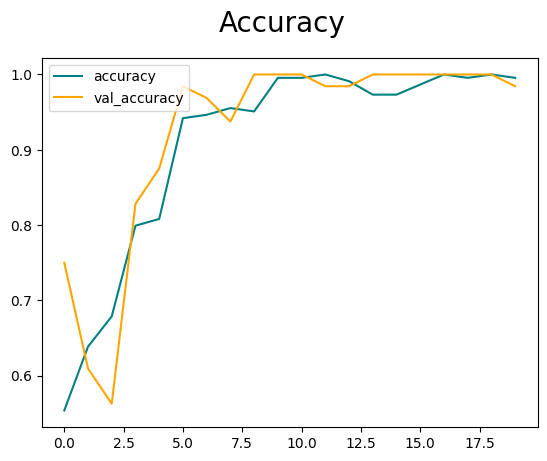

In [39]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [40]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [41]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [42]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 191ms/step


In [43]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [44]:
import cv2

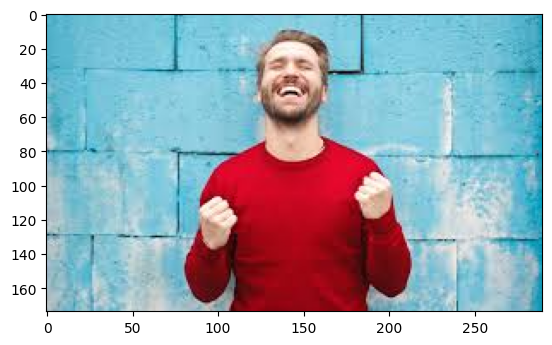

In [46]:
img = cv2.imread('/content/download.jpeg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [47]:
resize = tf.image.resize(img, (256,256))
# plt.imshow(cv2.cvtColor(resize,cv2.COLOR_BGR2RGB))
# plt.show()

In [48]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 26ms/step


In [49]:
yhat

array([[0.15434554]], dtype=float32)

In [50]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


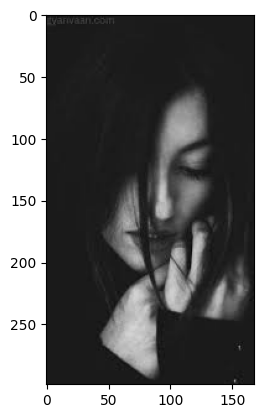

In [53]:
img = cv2.imread('/content/download (1).jpeg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [54]:
resize = tf.image.resize(img, (256,256))
yhat = model.predict(np.expand_dims(resize/255, 0))
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

1/1 [==============================] - 0s 30ms/step
Predicted class is Sad


# 11. Save the Model

In [55]:
from tensorflow.keras.models import load_model

In [56]:
model.save(os.path.join('models','classifier.h5'))

In [ ]:
# new_model = load_model('classifier.h5')

In [ ]:
# new_model.predict(np.expand_dims(resize/255, 0))